In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNNSNMetric_nSN_Total detected',
       '1 to 10 day Microlensing_Fraction detected of total (mean)',
       '100 to 1000 day Microlensing_Fraction detected of total (mean)',
       'KNePopMetric__multi_color_detect_Fraction detected of total (mean)',
       'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Fraction detected of total (mean)',
       'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
       'WeakLensingNvisits_Median',
       'Nstars_no_crowding_Total N Stars, no crowding',
       'ExgalM5_with_cuts_3x2ptFoM', 'DD:ELAISS1,u', 'DD:XMM-LSS,u',
       'DD:ECDFS,u', 'DD:COSMOS,u', 'DD:EDFSa,u', 'DD:EDFSb,u', 'DD:ELAISS1,g',
       'DD:XMM-LSS,g', 'DD:ECDFS,g', 'DD:COSMOS,g', 'DD:EDFSa,g', 'DD:E

In [19]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNNSNMetric_nSN_Total detected',
        'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
        'WeakLensingNvisits_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        '1 to 10 day Microlensing_Fraction detected of total (mean)', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding',
       'NEO bright', 'NEO faint', 'TNO']

linear_cols = []

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNNSNMetric_nSN_Total detected': 'SNeIa',
               '1 to 10 day Microlensing_Fraction detected of total (mean)': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Fraction detected of total (mean)': 'TDE',
               'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)':'TDE',
               'WeakLensingNvisits_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=6.0':' TNO',
              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [20]:
data['runName']


0    baseline
1     skyarea
Name: runName, dtype: object

In [21]:
runs =  [name for name in data['runName'].values]
runs

['baseline', 'skyarea']

In [22]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)

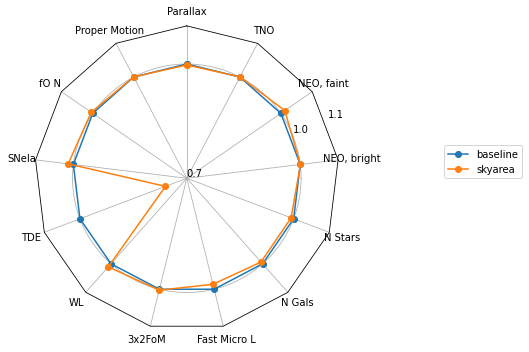

In [23]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.7, 1.0, 1.1])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')

In [24]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars,"NEO, bright","NEO, faint",TNO
0,baseline,1.000000,1.00000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
1,skyarea,0.997315,1.00044,1.004768,1.013621,0.76,1.010753,1.002617,0.986706,0.993635,0.992929,1.00043,1.012596,1.000617


In [27]:
data['TDEsPopMetric__some_color_pu_Fraction detected of total (mean)']


0    0.0100
1    0.0076
Name: TDEsPopMetric__some_color_pu_Fraction detected of total (mean), dtype: float64

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_49743/1523573111.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


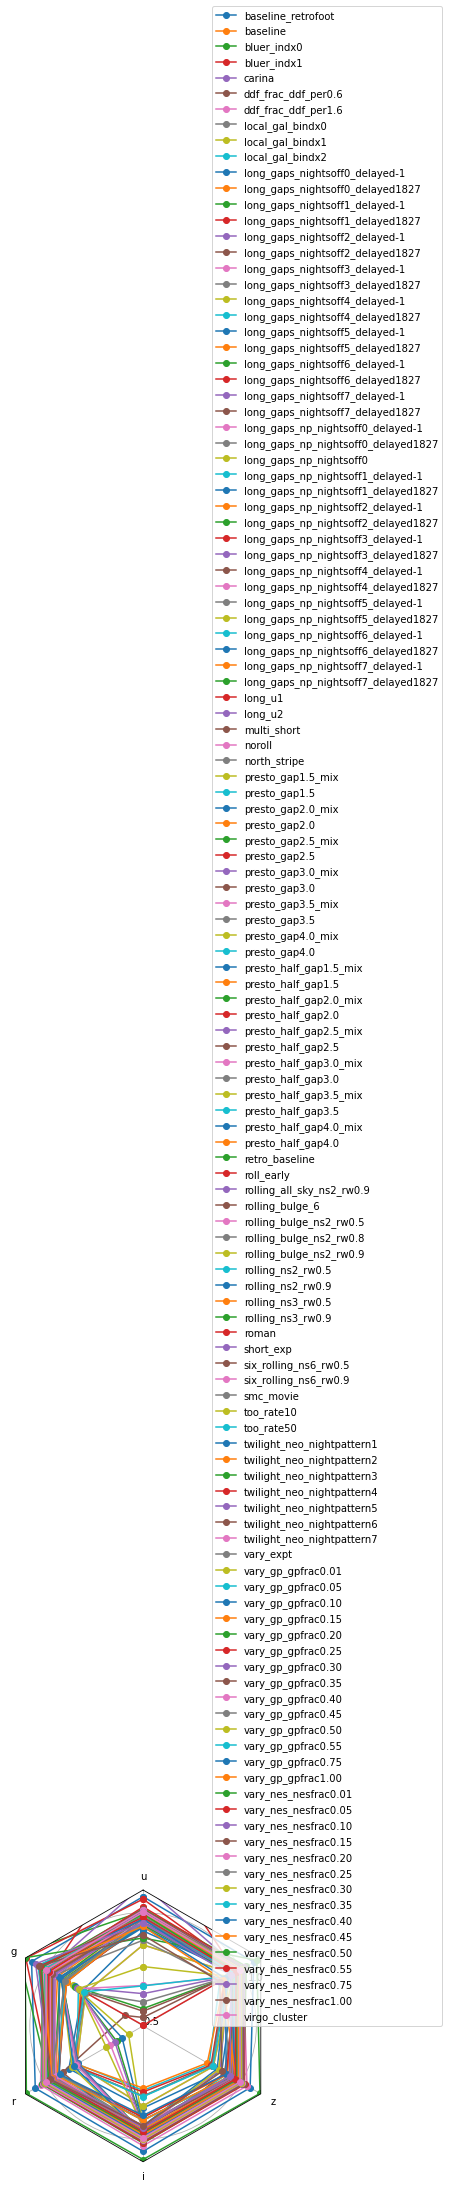

In [10]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.50, 1.0, 1.1], alpha=.1)
fig.tight_layout()

In [17]:
runs = ['baseline'] + [name for name in data['runName'].values if 'twi' in name] 

In [18]:
runs

['baseline',
 'twilight_neo_nightpattern1',
 'twilight_neo_nightpattern2',
 'twilight_neo_nightpattern3',
 'twilight_neo_nightpattern4',
 'twilight_neo_nightpattern5',
 'twilight_neo_nightpattern6',
 'twilight_neo_nightpattern7']

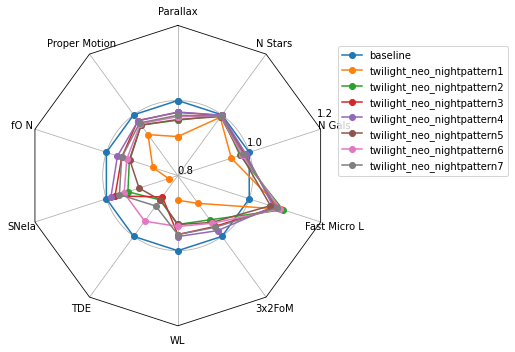

In [19]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.2])
fig.tight_layout()

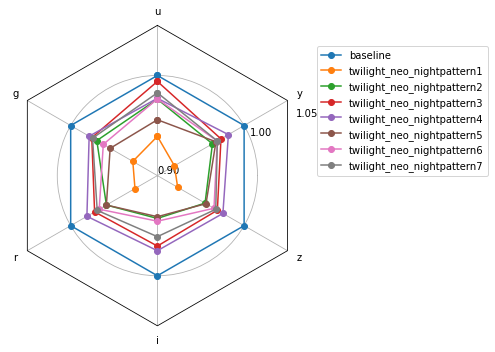

In [20]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.90, 1.0, 1.05], alpha=.1)
fig.tight_layout()

In [21]:
runs = ['baseline'] + [name for name in data['runName'].values if 'nes' in name] 

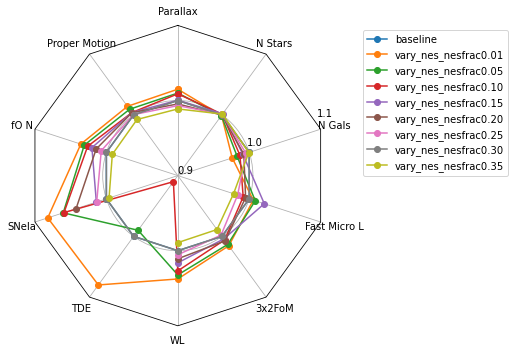

In [24]:
data_normed = norm_df(data, runs[0:9], cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()

In [25]:
runs = ['baseline'] + [name for name in data['runName'].values if 'gp' in name] 

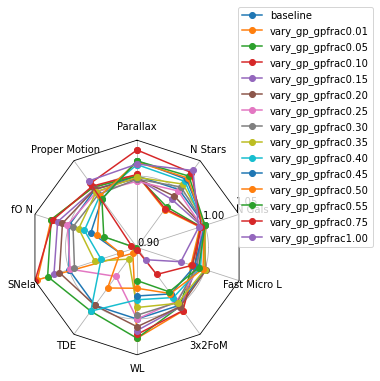

In [28]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.05])
fig.tight_layout()